## 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [1]:
# Cargar librerias necesarias

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Librerias del modelo a implementar
from sklearn.linear_model import LinearRegression

In [2]:
# Lectura de datos y cargue de archivos
Datos=pd.read_csv('./Titanic-Dataset.csv')

In [3]:
# Se realiza la lectura de datos para el análisis exploratorio.
Datos.head(30)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
Datos.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

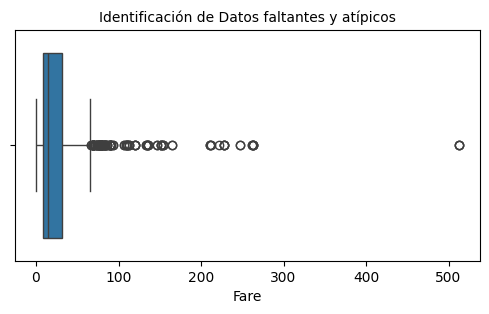

In [6]:
# Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Fare'])
plt.title('Identificación de Datos faltantes y atípicos',fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

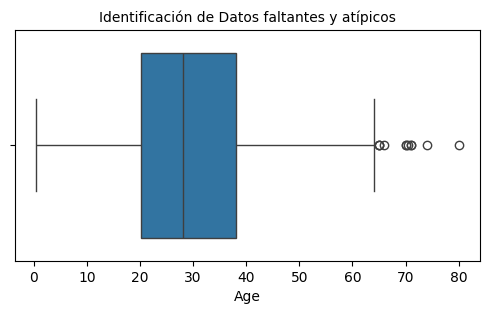

In [7]:
# Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos faltantes y atípicos',fontsize=10)

Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

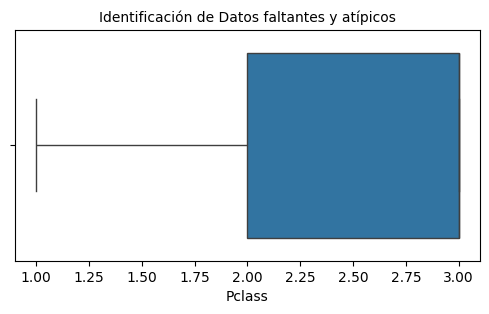

In [8]:
# Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Pclass'])
plt.title('Identificación de Datos faltantes y atípicos',fontsize=10)

## 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario.

In [10]:
print("Cantidad de registros con cero en la columna tarifa: ",Datos['Fare'].isin([0]).sum())
print("Cantidad de registros con cero en la columna edad: ",Datos['Age'].isin([0]).sum())
print("Cantidad de registros con cero en la columna Clase: ",Datos['Pclass'].isin([0]).sum())

Cantidad de registros con cero en la columna tarifa:  15
Cantidad de registros con cero en la columna edad:  0
Cantidad de registros con cero en la columna Clase:  0


Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

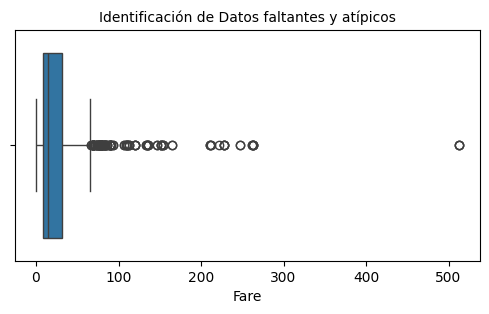

In [11]:
# Identificación de datos atípicos de la tarifa, se va a trabajar con tarifas de 0 a 100

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Fare'])
plt.title('Identificación de Datos faltantes y atípicos',fontsize=10)

In [12]:
# Conteo de datos atípicos

nivel_minimo=0
nivel_maximo=100
Total_atipicos=((Datos['Fare']< nivel_minimo) | (Datos['Fare']>nivel_maximo)).sum()
print("El total de datos atipicos es {} ".format(Total_atipicos))

El total de datos atipicos es 53 


In [13]:
# Filtra datos atípicos

Datos=Datos[(Datos['Fare']< nivel_maximo) & (Datos['Fare']>nivel_minimo)]

In [ ]:
# Validar si se removieron los datos atípicos

Total_atipicos=((Datos['Fare']< nivel_minimo) | (Datos['Fare']>nivel_maximo)).sum()
print("El total de datos atipicos es {} ".format(Total_atipicos))

El total de datos atipicos es 0 


Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

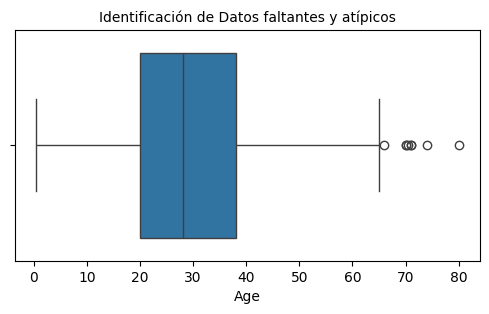

In [14]:
# Identificación de datos faltantes y atípicos de la Edad

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Age'])
plt.title('Identificación de Datos faltantes y atípicos',fontsize=10)

In [15]:
# Conteo de datos atípicos

nivel_minimo=20
nivel_maximo=60
Total_atipicos=((Datos['Age']< nivel_minimo) | (Datos['Age']>nivel_maximo)).sum()
print("El total de datos atipicos es {} ".format(Total_atipicos))

El total de datos atipicos es 173 


In [16]:
# Filtra datos atípicos

Datos=Datos[(Datos['Age']< nivel_maximo) & (Datos['Age']>nivel_minimo)]

In [17]:
# Validar si se removieron los datos atípicos

Total_atipicos=((Datos['Age']< nivel_minimo) | (Datos['Age']>nivel_maximo)).sum()
print("El total de datos atipicos es {} ".format(Total_atipicos))

El total de datos atipicos es 0 


Text(0.5, 1.0, 'Identificación de Datos faltantes y atípicos')

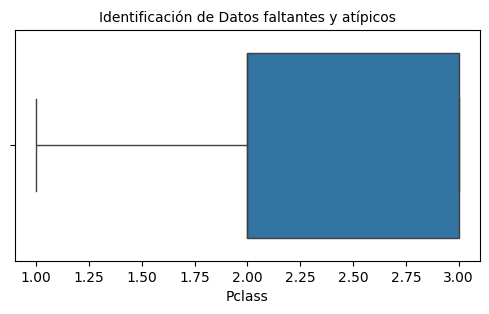

In [18]:
# Identificación de datos faltantes y atípicos

plt.figure(figsize=(6,3))
sns.boxplot(x=Datos['Pclass'])
plt.title('Identificación de Datos faltantes y atípicos',fontsize=10)

In [20]:
# Conteo de datos atípicos

nivel_minimo=1
nivel_maximo=3
Total_atipicos=((Datos['Pclass']< nivel_minimo) | (Datos['Pclass']>nivel_maximo)).sum()
print("El total de datos atipicos es {} ".format(Total_atipicos))

El total de datos atipicos es 0 


In [21]:
# Filtra datos atípicos

Datos=Datos[(Datos['Pclass']< nivel_maximo) & (Datos['Pclass']>nivel_minimo)]

In [22]:
# Validar si se removieron los datos atípicos

Total_atipicos=((Datos['Pclass']< nivel_minimo) | (Datos['Pclass']>nivel_maximo)).sum()
print("El total de datos atipicos es {} ".format(Total_atipicos))

El total de datos atipicos es 0 


In [23]:
##Revision de tipos de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, 15 to 886
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  134 non-null    int64  
 1   Survived     134 non-null    int64  
 2   Pclass       134 non-null    int64  
 3   Name         134 non-null    object 
 4   Sex          134 non-null    object 
 5   Age          134 non-null    float64
 6   SibSp        134 non-null    int64  
 7   Parch        134 non-null    int64  
 8   Ticket       134 non-null    object 
 9   Fare         134 non-null    float64
 10  Cabin        11 non-null     object 
 11  Embarked     134 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 13.6+ KB


## 3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características.

### La idea es que según el año del modelo y el kilometraje del automovil, el modelo nos de el precio de venta al consumidor.

In [25]:
# Convertir los datos en un dataframe
df=pd.DataFrame(Datos)

# Variables independientes (modelo y kilometraje) y dependdientes(precio de venta)
X=df[['Age','Pclass']]
Y=df['Fare']

# Crear modelo de regresión lineal
modelo = LinearRegression()

# Ajustar el modelo a los datos
modelo.fit(X,Y)

# Coeficientes de la regresión
beta_0 = modelo.intercept_
beta_1, beta_2 = modelo.coef_

# Mostrar los coeficientes
print(f"Intercepto (B0): {beta_0}")
print(f"Intercepto (Age ,B1): {beta_1}")
print(f"Intercepto (Fare, B2): {beta_2}")

Intercepto (B0): 26.71238782185793
Intercepto (Age ,B1): -0.17652043825172775
Intercepto (Fare, B2): 0.0


In [27]:
# Predecir precios para dos nuevos valores
nuevo_X= np.array([[50,2],[30,3]])
predicciones=modelo.predict(nuevo_X)

# Mostrar las predicciones
print("\nPredicciones")
for i, pred in enumerate(predicciones):
    print(f"Predicción {i+1} para (Edad: {nuevo_X[i][0]}, Clase: {nuevo_X[i][1]}): {pred:.2f} USD")


Predicciones
Predicción 1 para (Edad: 50, Clase: 2): 17.89 USD
Predicción 2 para (Edad: 30, Clase: 3): 21.42 USD


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [29]:
# Importar librerias necesarias
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Variables independientes (Edad y clase) y dependdientes(precio de tarifa)
x=df[['Age','Pclass']]
y=df['Fare']

# Crear modelo de regresión lineal
model = LinearRegression()

# Ajustar el modelo a los datos
model.fit(x,y)

# Entrenar el modelo con los datos
predicciones=model.predict(x)

# Calcular las métricas de evaluación
r2 = r2_score(y,predicciones) # Coeficiente de determinacion R^2
mae = mean_absolute_error(y,predicciones) # Error absoluto medio
mse = mean_squared_error(y,predicciones) # Error cuadratico medio
rmse = np.sqrt(mse) # Raiz del error cuadratico medio

# Imprimir las métricas
print(f'R²(Coeficiente de determinación): {r2}')
print(f'Error Absoluto medio (mae): {mae}')

R²(Coeficiente de determinación): 0.01610421191953859
Error Absoluto medio (mae): 9.166126063593769


El coeficiente de determinarción para este caso esta cercano al 1.61% de linealidad entre las variables y existe un error absoluto medio de 9.166 aproximadamente. El resultado no garantiza que existe una linealidad entre las variables en cuestión con una linealidad muy baja cercana al 1,61%